In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('labeled_data.csv')

In [3]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
df.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [5]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
df['class'].unique()

array([2, 1, 0], dtype=int64)

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(24783, 2)

<Axes: xlabel='class', ylabel='count'>

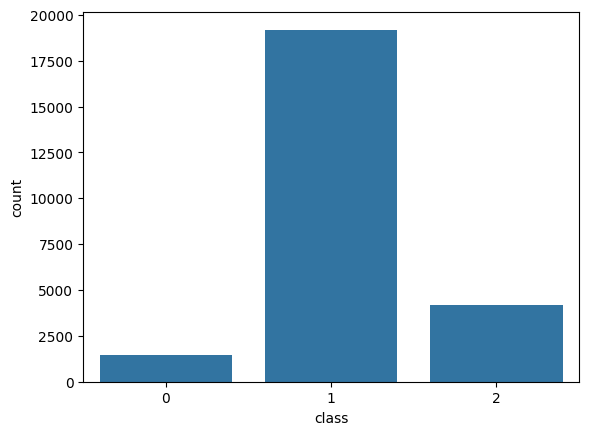

In [9]:
sns.countplot(x='class' , data=df)

In [10]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [11]:
lemma=WordNetLemmatizer()
stop=set(stopwords.words('english'))

def preprocess(text):
    text=text.lower()

    #remove special character and digits
    text=re.sub(r'[^a-zA-z]', ' ', text)

    #tokenize
    words=text.split()

    #remove stop words
    words=[word for word in words if word not in stop]

    #lemmatize 
    words=[lemma.lemmatize(word) for word in words]

    #join the words back 
    text=' '.join(words)

    return text


In [12]:
df['tweet']=df['tweet'].apply(preprocess)

In [13]:
df['tweet']

0        rt mayasolovely woman complain cleaning house ...
1        rt mleew boy dat cold tyga dwn bad cuffin dat ...
2        rt urkindofbrand dawg rt sbaby life ever fuck ...
3              rt c_g_anderson viva_based look like tranny
4        rt shenikaroberts shit hear might true might f...
                               ...                        
24778    muthaf lie lifeasking _pearls corey_emanuel ri...
24779      gone broke wrong heart baby drove redneck crazy
24780    young buck wanna eat dat nigguh like aint fuck...
24781                       youu got wild bitch tellin lie
24782    ruffled ntac eileen dahlia beautiful color com...
Name: tweet, Length: 24783, dtype: object

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
vector=TfidfVectorizer()

In [16]:
X=vector.fit_transform(df['tweet']).toarray()

In [17]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
X.shape

(24783, 33589)

In [19]:
y=df['class']

In [20]:
y.shape

(24783,)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=52)

In [23]:
X_train.shape

(17348, 33589)

In [24]:
X_test.shape

(7435, 33589)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_jobs=5)

In [26]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_jobs=5)

In [27]:
rfc.score(X_train,y_train)

0.9995964952732304

In [29]:
y_pred=rfc.predict(X_test)

In [35]:
from sklearn.metrics import  classification_report,confusion_matrix,ConfusionMatrixDisplay

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.08      0.15       412
           1       0.90      0.98      0.94      5751
           2       0.87      0.79      0.83      1272

    accuracy                           0.90      7435
   macro avg       0.79      0.62      0.64      7435
weighted avg       0.88      0.90      0.88      7435



<Axes: >

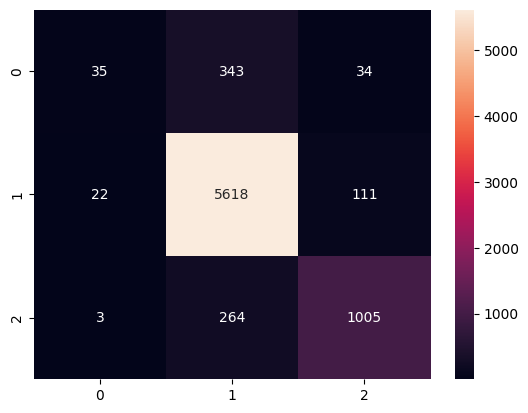

In [34]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

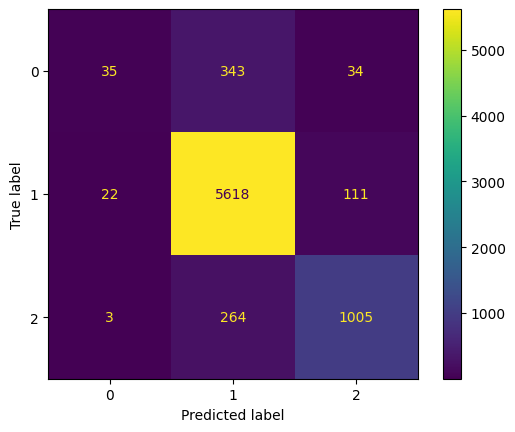

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [37]:
import tkinter as tk

def submit_text():
    # Get the text from the input box
    input_text = text_input.get("1.0", tk.END).strip()

    input_text = preprocess(input_text)
    input_text=vector.transform([input_text]).toarray()
    if rfc.predict(input_text) == 0:
        input_text='hate speech'
    elif rfc.predict(input_text)==1:
        input_text='offensive  language'
    else:
        input_text='neither'
    # Display the input text in the result box
    result_box.config(state=tk.NORMAL)  # Enable editing to insert text
    result_box.delete("1.0", tk.END)  # Clear previous results
    result_box.insert(tk.END, input_text)  # Insert new text
    result_box.config(state=tk.DISABLED)  # Disable editing again

# Create the main window
root = tk.Tk()
root.title("Text Box Example")

# Create a large text box
text_input = tk.Text(root, height=10, width=50)
text_input.pack(pady=10)

# Create a submit button
submit_button = tk.Button(root, text="Submit", command=submit_text)
submit_button.pack(pady=5)

# Create a smaller result box (read-only)
result_box = tk.Text(root, height=2, width=20, state=tk.DISABLED)  # Adjusted height
result_box.pack(pady=10)

# Start the Tkinter event loop
root.mainloop()